In [2]:
# 美国2012年总统候选人政治献金数据分析

In [3]:
导入包

NameError: name '导入包' is not defined

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

In [ ]:
方便大家操作，将月份和参选人以及所在政党进行定义

In [5]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [ ]:
读取文件

In [4]:
usa_election = pd.read_table('./usa_election.txt',sep=',',low_memory=False)

In [ ]:
查看文件样式以及基本信息

In [12]:
usa_election.shape
usa_election

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,852106725,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,857498865,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,


In [ ]:
【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [5]:
usa_election['party'] = ''
usa_election['party'] = usa_election['cand_nm'].map(parties)
usa_election

NameError: name 'parties' is not defined

In [ ]:
查看单独一行，是否加上了'party'一列

In [120]:
usa_election['party'].isnull().any()

False

In [ ]:
使用np.unique()函数查看colums：party这一列中有哪些元素

In [24]:
np.unique(usa_election['party'])

array(['Democrat', 'Libertarian', 'Reform', 'Republican'], dtype=object)

In [ ]:
使用value_counts()函数，统计party列中各个元素出现次数

In [27]:
pd.value_counts(usa_election['party'])

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

In [ ]:
【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [121]:
usa_election.groupby('party').groups
# type(usa_election)
usa_election.groupby('party')['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

In [ ]:
查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [122]:
usa_election.groupby(['contb_receipt_dt','party'])['contb_receipt_amt'].sum()

contb_receipt_dt  party      
01-APR-11         Reform              50.00
                  Republican       12635.00
01-AUG-11         Democrat        175281.00
                  Libertarian       1000.00
                  Reform            1847.00
                  Republican      234598.46
01-DEC-11         Democrat        651532.82
                  Libertarian        725.00
                  Reform             875.00
                  Republican      486405.96
01-FEB-11         Republican         250.00
01-JAN-11         Republican        8600.00
01-JAN-12         Democrat         58098.80
                  Reform             515.00
                  Republican       75704.72
01-JUL-11         Democrat        165961.00
                  Libertarian       2000.00
                  Reform             100.00
                  Republican      115848.72
01-JUN-11         Democrat        145459.00
                  Libertarian        500.00
                  Reform              50.00
  

In [ ]:
查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [163]:
usa_election['contb_receipt_dt']

pandas.core.series.Series

In [176]:
# def time_pd(item):
# #     print(item)
# #     print('--------')
#     date = item.split('-')
#     year = '20'+date[2]
#     day = date[0]
#     m = date[1]
#     for k,v in months.items():
#         if m == k:
#             month = v
#             s = str(year)+'/'+str(month)+'/'+str(day)
#             return pd.Timestamp(s)
def time_pd(item):
    a = pd.to_datetime(item)
    return a
usa_election['contb_receipt_dt'] = usa_election['contb_receipt_dt'].map(time_pd)
usa_election['contb_receipt_dt']

0        2011-06-20
1        2011-06-23
2        2011-07-05
3        2011-08-01
4        2011-06-20
5        2011-06-23
6        2011-06-21
7        2011-07-05
8        2011-06-21
9        2011-06-20
10       2011-06-22
11       2011-06-22
12       2011-06-21
13       2011-06-17
14       2011-07-11
15       2011-07-08
16       2011-07-05
17       2011-06-27
18       2011-06-13
19       2011-06-16
20       2011-06-16
21       2011-06-16
22       2011-06-17
23       2011-06-17
24       2011-07-18
25       2011-07-18
26       2011-08-05
27       2011-07-01
28       2011-07-05
29       2011-07-05
            ...    
536011   2011-09-30
536012   2011-09-30
536013   2011-09-30
536014   2011-09-30
536015   2011-09-30
536016   2011-09-30
536017   2011-09-30
536018   2011-09-30
536019   2011-09-30
536020   2011-09-29
536021   2011-11-15
536022   2011-10-29
536023   2011-11-12
536024   2011-11-30
536025   2011-08-17
536026   2011-08-26
536027   2011-10-04
536028   2011-10-04
536029   2011-09-30


In [166]:
查看是否转换成功

NameError: name '查看是否转换成功' is not defined

In [177]:
usa_election['contb_receipt_dt']

0        2011-06-20
1        2011-06-23
2        2011-07-05
3        2011-08-01
4        2011-06-20
5        2011-06-23
6        2011-06-21
7        2011-07-05
8        2011-06-21
9        2011-06-20
10       2011-06-22
11       2011-06-22
12       2011-06-21
13       2011-06-17
14       2011-07-11
15       2011-07-08
16       2011-07-05
17       2011-06-27
18       2011-06-13
19       2011-06-16
20       2011-06-16
21       2011-06-16
22       2011-06-17
23       2011-06-17
24       2011-07-18
25       2011-07-18
26       2011-08-05
27       2011-07-01
28       2011-07-05
29       2011-07-05
            ...    
536011   2011-09-30
536012   2011-09-30
536013   2011-09-30
536014   2011-09-30
536015   2011-09-30
536016   2011-09-30
536017   2011-09-30
536018   2011-09-30
536019   2011-09-30
536020   2011-09-29
536021   2011-11-15
536022   2011-10-29
536023   2011-11-12
536024   2011-11-30
536025   2011-08-17
536026   2011-08-26
536027   2011-10-04
536028   2011-10-04
536029   2011-09-30


In [ ]:
将时间转换为时间数据类型
根据时间进行排序

In [282]:
# usa_election[usa_election[:,10].argsort()]
usa_election.sort_values(by='contb_receipt_dt')

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
469861,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
469860,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
478476,C00496067,P00003608,"Cain, Herman","ANDINGF, AL",MONONA,WI,537162503,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463851,C00496067,P00003608,"Cain, Herman","MANN, KEITH",UNIVERSITY PARK,FL,342012269,US ARMY,SOLDIER,500.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463850,C00496067,P00003608,"Cain, Herman","COOPER, ROBERT",ORLANDO,FL,328264121,TEAM HEALTH,PHYSICIAN,250.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican


In [ ]:
得到转换后的，每天各政党所收政治献金数目。

考察知识点：groupby（多个字段）

In [209]:
usa_money_day = usa_election.groupby(['contb_receipt_dt','party'])['contb_receipt_amt'].sum()
usa_money_day

contb_receipt_dt  party     
2011-01-01        Republican       8600.00
2011-01-03        Republican       4800.00
2011-01-04        Republican       5000.00
2011-01-12        Republican       4150.00
2011-01-13        Republican       4000.00
2011-01-14        Republican       6000.00
2011-01-15        Republican        500.00
2011-01-16        Republican        750.00
2011-01-17        Republican        500.00
2011-01-18        Republican       4800.00
2011-01-20        Republican       2650.00
2011-01-21        Republican        250.00
2011-01-22        Republican        250.00
2011-01-24        Republican       2400.00
2011-01-26        Republican       5400.00
2011-01-27        Republican       2650.00
2011-01-28        Republican        650.00
2011-01-29        Republican        750.00
2011-01-31        Republican       6000.00
2011-02-01        Republican        250.00
2011-02-03        Republican       3250.00
2011-02-04        Republican       1000.00
2011-02-07        Republi

In [ ]:
【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [215]:
usa_money_day_b = usa_money_day.unstack('party')
usa_money_day_b

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01,NaN,NaN,NaN,8600.00
2011-01-03,NaN,NaN,NaN,4800.00
2011-01-04,NaN,NaN,NaN,5000.00
2011-01-12,NaN,NaN,NaN,4150.00
2011-01-13,NaN,NaN,NaN,4000.00
2011-01-14,NaN,NaN,NaN,6000.00
2011-01-15,NaN,NaN,NaN,500.00
2011-01-16,NaN,NaN,NaN,750.00
2011-01-17,NaN,NaN,NaN,500.00


In [ ]:
使用上面获取的数据
画出各党派累计政治献金,cumsum()累加函数

In [225]:
usa_money_day_b.loc['party_sum'] = usa_money_day_b.apply(lambda x:x.sum(),axis=0)
usa_money_day_b

party,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,8.600000e+03
2011-01-03 00:00:00,NaN,NaN,NaN,4.800000e+03
2011-01-04 00:00:00,NaN,NaN,NaN,5.000000e+03
2011-01-12 00:00:00,NaN,NaN,NaN,4.150000e+03
2011-01-13 00:00:00,NaN,NaN,NaN,4.000000e+03
2011-01-14 00:00:00,NaN,NaN,NaN,6.000000e+03
2011-01-15 00:00:00,NaN,NaN,NaN,5.000000e+02
2011-01-16 00:00:00,NaN,NaN,NaN,7.500000e+02
2011-01-17 00:00:00,NaN,NaN,NaN,5.000000e+02


In [286]:
# usa_money_day_b = usa_money_day_b.drop(['party_sum'],axis=0)

ValueError: labels ['party_sum'] not contained in axis

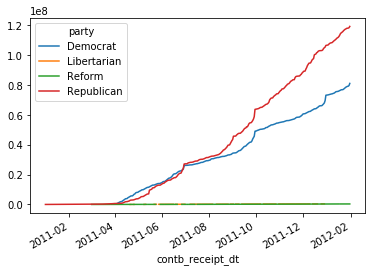

In [288]:
import matplotlib.pyplot as plt
usa_money_day_b.cumsum().plot()

In [277]:
把时间作为列，党派作为行来观察,unstack('contb_receipt')

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
        2.0000000e+02,  4.1250000e+03,  4.5650000e+03,  2.0550000e+03,
        1.1200000e+03,  2.5750000e+03,  2.5350000e+03,  1.8350000e+03,
        1.2950000e+03,  1.1050000e+03,  4.0000000e+02,  3.2500000e+02,
        3.0000000e+02,  3.0000000e+02,  2.5500000e+02,  7.2000000e+02,
      

In [307]:
uu = usa_money_day_b.stack().unstack('contb_receipt_dt')
uu

contb_receipt_dt,2011-01-01 00:00:00,2011-01-03 00:00:00,2011-01-04 00:00:00,2011-01-12 00:00:00,2011-01-13 00:00:00,2011-01-14 00:00:00,2011-01-15 00:00:00,2011-01-16 00:00:00,2011-01-17 00:00:00,2011-01-18 00:00:00,...,2012-01-22 00:00:00,2012-01-23 00:00:00,2012-01-24 00:00:00,2012-01-25 00:00:00,2012-01-26 00:00:00,2012-01-27 00:00:00,2012-01-28 00:00:00,2012-01-29 00:00:00,2012-01-30 00:00:00,2012-01-31 00:00:00
party,,,,,,,,,,,,,,,,,,,,,
Democrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67194.23,337307.07,458909.23,438949.32,450268.94,305785.47,235492.85,93177.00,435921.72,1418410.31
Libertarian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,450.00,225.00,500.00,282.00,25.00,3176.37,175.00,200.00,130.00,150.00
Republican,8600.0,4800.0,5000.0,4150.0,4000.0,6000.0,500.0,750.0,500.0,4800.0,...,507168.71,645477.15,462233.66,416931.39,256406.86,368441.82,82775.80,75220.02,255204.80,869890.41


In [ ]:
使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [333]:
uu2 = uu.unstack()
uu2.fillna(0)

contb_receipt_dt  party      
2011-01-01        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        8600.00
2011-01-03        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        4800.00
2011-01-04        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        5000.00
2011-01-12        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        4150.00
2011-01-13        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        4000.00
2011-01-14        Democrat             0.00
                  Libertarian          0.00
  

In [ ]:
查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。
能看出各个候选人主要的支持者分布情况  

In [6]:
usa_election.fillna(0)
usa_election.groupby(['cand_nm','contbr_occupation','contb_receipt_amt']).groups

{('Bachmann, Michelle',
  'RETIRED',
  250.0): Int64Index([     0,      3,      7,     10,     18,     21,     32,     37,
                 38,     40,
             ...
             517947, 517978, 517997, 518097, 518223, 518235, 518354, 518378,
             518388, 518466],
            dtype='int64', length=365),
 ('Bachmann, Michelle',
  'RETIRED',
  50.0): Int64Index([     1,     85,     93,     96,    401, 506584, 506585, 506604,
             506606, 506607,
             ...
             518375, 518401, 518402, 518411, 518418, 518419, 518447, 518450,
             518455, 518456],
            dtype='int64', length=579),
 ('Bachmann, Michelle',
  'INFORMATION REQUESTED',
  250.0): Int64Index([     2,      6,     12,     14,     17,     27,     46,     61,
                 63,     81,     82,     89,    101,    102,    106,    114,
                138,    155,    188,    222,    243,    257,    261,    287,
                297,    341,    395,    399,    404,    407, 507090, 507150,
 

party       contb_receipt_dt   
Democrat    2011-01-01 00:00:00             NaN
            2011-01-03 00:00:00             NaN
            2011-01-04 00:00:00             NaN
            2011-01-12 00:00:00             NaN
            2011-01-13 00:00:00             NaN
            2011-01-14 00:00:00             NaN
            2011-01-15 00:00:00             NaN
            2011-01-16 00:00:00             NaN
            2011-01-17 00:00:00             NaN
            2011-01-18 00:00:00             NaN
            2011-01-20 00:00:00             NaN
            2011-01-21 00:00:00             NaN
            2011-01-22 00:00:00             NaN
            2011-01-24 00:00:00             NaN
            2011-01-26 00:00:00             NaN
            2011-01-27 00:00:00             NaN
            2011-01-28 00:00:00             NaN
            2011-01-29 00:00:00             NaN
            2011-01-31 00:00:00             NaN
            2011-02-01 00:00:00             NaN
        